# Prática 2 - Exploração de Dados - Parte 2

#Nome: Ricardo França Fernandes do Vale     No. USP: 9293477

OBSERVAÇÃO: Para mais informações das escolhas da Prática 1, o arquivo atualizado encontra-se no mesmo diretório deste notebook.

Nesta prática, será feita uma nova exploração de dados a partir de medidas de espalhamento e de distribuição, partindo das hipóteses levantadas. 

## Dataset 1 - Boston Housing

### 1. Recapitulando as perguntas iniciais:

Podemos pontuar as hipóteses feitas anteriormente:

* Quanto menor a taxa de crime (CRIM), maior a incidência de professores de ensino básico (PTRATIO)?
* Quanto mais perto de centros de emprego (DIS), maior o preço das casas habitadas (MEDV)?
* Quanto menor a incidência de comércio/empresas (maior o ZN), menor o preço das casas habitadas (MEDV)?

2/3 das hipóteses não foram contempladas com a exploração de dados anterior, no entanto, as medidas de centralidade não foram adequadas o suficiente para testar as questões com precisão, no entanto, o refinamento de atributos para 5 dimensões será mantido. Dessa forma, serão usados apenas os atributos:
* CRIM (taxa de crimes na região); 
* ZN (proporção de espaços residenciais em áreas de 25000 pés quadrados); 
* NOX (concentração de óxido nítrico, que configura poluição); 
* DIS (distância ponderada dos centros de emprego na cidade); 
* PTRATIO (índice de professores de ensino básico na região de interesse);
* E a classe MEDV, que é o valor mediano das casas habitadas na região de interesse.

Quanto às hipóteses em si, elas serão mantidas, agora testadas sob o ponto de vista de medidas de espalhamento e de dispersão. Abaixo será carregado o dataset:

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = load_boston()
boston = pd.DataFrame(data=np.c_[data['data'], data['target']], 
                          columns=np.r_[data['feature_names'], ['target']])
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### 2.1. Execução de  boxplots e estatística descritiva:

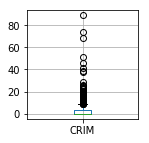

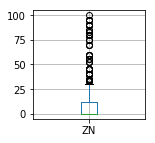

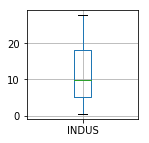

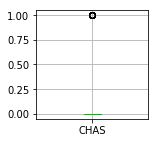

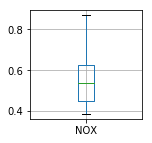

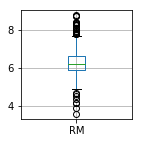

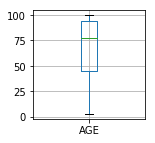

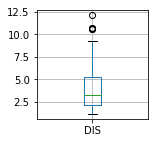

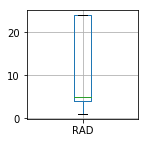

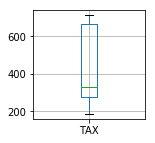

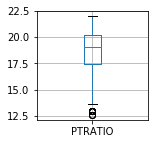

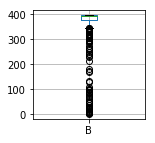

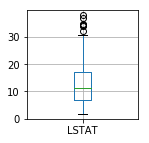

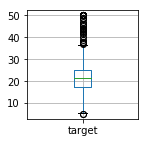

In [10]:
#Dessa vez, os atributos serão selecionados, formando uma cópia reduzida do dataset
clean_boston = boston[['CRIM','ZN','NOX','DIS','PTRATIO','target']].copy()
for i in range(len(boston.columns)):
    boston.boxplot(column=boston.columns[[i]].tolist(),figsize=(2,2))
    plt.show()


In [66]:
#Já que os atributos são contínuos, descarta-se a possibilidade de plotar boxplots por classe 
#Analisar-se-ão os outliers de CRIM, ZN, DIS

print('Total de unidades experimentais no dataset: ', end='')
print(len(clean_boston['target']))

tolerance = (1.5*(clean_boston['CRIM'].quantile(q=0.75) - clean_boston['CRIM'].quantile(q=0.25))) + clean_boston['CRIM'].quantile(q=0.75)
print('Total de outliers no atributo CRIM: ', end='')
print(len(clean_boston[clean_boston['CRIM'] > tolerance]))

tolerance = (1.5*(clean_boston['DIS'].quantile(q=0.75) - clean_boston['DIS'].quantile(q=0.25))) + clean_boston['DIS'].quantile(q=0.75)
print('Total de outliers no atributo DIS: ', end='')
print(len(clean_boston[clean_boston['DIS'] > tolerance]))

tolerance = (1.5*(clean_boston['ZN'].quantile(q=0.75) - clean_boston['ZN'].quantile(q=0.25))) + clean_boston['ZN'].quantile(q=0.75)
print('Total de outliers no atributo ZN: ', end='')
print(len(clean_boston[clean_boston['ZN'] > tolerance]))

Total de unidades experimentais no dataset: 506
Total de outliers no atributo CRIM: 65
Total de outliers no atributo DIS: 5
Total de outliers no atributo ZN: 68


#### Respondendo perguntas sobre boxplot

- O boxplot ajuda numa melhor compreensão dos dados?

    O gráfico é muito mais intuitivo para inferir, como cientista, do que observar as medidas de centralidade, seja separadamente, seja com o describe(). Neste caso, foi possível observar que dois atributos utilizados nas hipóteses possuem muitas unidades experimentais fora do intervalo de quartis, dificultando a análise para a validação das hipóteses.


- Porque e quando você usaria o boxplot?
     
     Como, no caso, o dataset possui apenas valores contínuos, é complicado fazer a separação por classe, já que o resultado é calculado gerando um valor contínuo (um modelo classificador para ele deveria ser baseado em regressão); no entanto, a análise separada dos atributos auxilia a enxergar o comportamento dos dados em uma instância intervalar e permite, no caso, descartar o uso de medidas de centralidade para tomadas de deicsão. 
     
     
- De acordo com o boxplot, há outliers nos seus atributos? se sim esses pontos marcados como outliers parecem mesmo outliers? explique.
    Sim, nos atributos analisados, menos em NOX, existem outliers. Pelo próprio boxplot, é possível observar os valores que se distanciam dos quartis e é possível assegurar que estes valores são outliers de fato.
    Os outliers de ZN e CRIM não ultrapassam 100 e, já que tais atributos representam "proporções", podem assumir, de fato, valores de 0 a 100, que representariam as porcentagens. 
    E no caso de DIS, os outliers representam distânicias absolutas, sem limite superior e com limite inferior 0, limitantes estes respeitados pelos valores fora dos quantis, como é possível observar no próprio bloxpot, exibido acima.
    Por sua vez, PTRATIO possui outliers abaixo dos valores de quantis. Dado o boxplot, podemos ver que os valores não estão abaixo de zero, sendo assim as proporções (porcentagens) outliers também são válidas.

### 2.2. Intervalo máximo e estatística descritiva:

In [68]:
#obtenção do intervalo dos atributos
clean_boston.max()-clean_boston.min()

CRIM        88.96988
ZN         100.00000
NOX          0.48600
DIS         10.99690
PTRATIO      9.40000
target      45.00000
dtype: float64

#### Respondendo questões sobre intervalos máximos

- O intervalo máximo pode induzir ao erro ao interpretá-lo? Em qual cenário? Mostrar no seu dataset se possível, se não for o caso para o dataset explicar em um cenário que ocorre.
   
   Na intenção de observar o espalhamento pode ser uma boa medida para apenas enxergar outliers, no caso de intervalos muito grandes; ou para enxergar a amplitude dos dados, de fato, aliando essas medidas ao boxplot para observar a influência de outliers muito dispersos.
   Como pode ser observado nos atributos CRIM e ZN, o intervalo não é uma boa medida, pois ambos possuem muitos outliers com uma dispersão alta e, ainda assim, não possuem erro conceitual (mas podem ter sofrido alterações anômalas durante o período de coleta).

### 2.3. Momentos estatísticos centrados e originais

In [150]:
#vetor com as strings dos atributos
attrs = ['CRIM', 'ZN', 'DIS', 'PTRATIO', 'NOX']

#Calculo do momento original dos atributos
for feature in attrs:
    values = clean_boston[feature].value_counts().index.values
    prob = clean_boston[feature].value_counts().values / np.sum(clean_boston[feature].value_counts().values)
    for k in range(1,5):
        mi_k = 0
        for i in range(len(values)):
            mi_k += np.power(values[i],k) * prob[i]
        print('O momento original para k = '+str(k)+' do atributo '+feature+' é: '+str(mi_k))

print('\n\n')        
#Calculo do momento central dos atributos, estes métodos já são provenientes da PANDAS
for feature in attrs:
    print('O momento central para k = 1 do atributo '+feature+' é: '+str(clean_boston[feature].mad()))
    print('O momento central para k = 2 do atributo '+feature+' é: '+str(clean_boston[feature].var()))
    print('O momento central para k = 3 do atributo '+feature+' é: '+str(clean_boston[feature].skew()))
    print('O momento central para k = 4 do atributo '+feature+' é: '+str(clean_boston[feature].kurtosis()))

O momento original para k = 1 do atributo CRIM é: 3.593760711462449
O momento original para k = 2 do atributo CRIM é: 86.67373034614776
O momento original para k = 3 do atributo CRIM é: 4149.57858252705
O momento original para k = 4 do atributo CRIM é: 270438.97191548045
O momento original para k = 1 do atributo ZN é: 11.363636363636362
O momento original para k = 2 do atributo ZN é: 671.9940711462452
O momento original para k = 3 do atributo ZN é: 48041.55780632412
O momento original para k = 4 do atributo ZN é: 3770059.7727272725
O momento original para k = 1 do atributo DIS é: 3.7950426877470353
O momento original para k = 2 do atributo DIS é: 18.82760126343873
O momento original para k = 3 do atributo DIS é: 114.43040131852688
O momento original para k = 4 do atributo DIS é: 800.3638413928876
O momento original para k = 1 do atributo PTRATIO é: 18.45553359683794
O momento original para k = 2 do atributo PTRATIO é: 345.2844466403161
O momento original para k = 3 do atributo PTRATIO 

#### Respondendo perguntas sobre momentos

- Quando é indicado utilizar os momentos estatísticos para EDA?
    
    Os momentos são utilizados para descrição de comportamentos específicos dos atributos da base de dados, mais especificamente: a média é utilizada para observar a centralidade dos dados; a variância serve para verificar o quão longe, em geral, os valores do dataset estão da média obtida, verificando o espalhamento; a obliquidade é uma medida que observa simetria nos dados, inferindo sobre a distribuição; assim como a curtose, que, por sua vez, analisa o achatamento da função de distribuição. Todas as medidas citadas anteriormente podem ser utilizadas para observar a hipóteses dos dados seguirem distribuições normais.
 
 
- Pelos valores dos momentos centrados, os atributos parecem seguir uma distribuição normal (nos slides tem uma indicação de quando um atributo parece seguir uma normal)? Explique. Se já existe uma função para alguma medida pode utilizar, caso contrário você precisa implementar tal método.

     Olhando por atributo, os momentos não parecem indicar que algum atributo segue uma distribuição normal. Olhando os momentos obliquidade e curtose, no entanto, podemos observar que os atributos, com exceção de CRIM e ZN, provavelmente devido à disposição grande de outliers, possuem obliquidade baixo, portanto alta simetria, em contraposição a valores baixissimos de curtose, cujo valor esperado é 3. De qualquer forma, assumir distribuição normal em qualquer um dos atributos é arriscado e será uma hipótese descartada devido aos valores apresentados.

### 3. Conclusão
#### Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas para questões

As hipóteses serão mantidas tendo em vista que seus escopos estão mais atribuídos à verificação de correlações e covariâncias. No entanto, foi importante perceber o alto espalhamento dos atributos CRIM e ZN e que, possivelmente, seria possível aproveitar o atributo NOX, caso uma das hipóteses falhe, devido ao seu comportamento quase canônico diante das medidas de distribuição e espalhamento.

## Dataset 2 - Agro

### 1. Recapitulando as perguntas iniciais:

Podemos pontuar as hipóteses feitas anteriormente:

* Plantios onde há uma incidência maior de chuvas podem ter maior incidência de falhas
* Assim como, plantios onde há uma incidência menor de chuvas podem podem ter maior incidência de falhas
* Plantios com maior resistência de solo tem menor incidência de falhas

2/3 das hipóteses não foram contempladas com a exploração de dados anterior, no entanto, as medidas de centralidade não foram adequadas o suficiente para testar as questões com precisão, no entanto, o refinamento de atributos para 5 dimensões será mantido. Dessa forma, serão usados apenas os atributos:

* O percentual de falhas (percFalha); 
* A duração do solo perante a chuvas, entendido como a resistência do mesmo diante de ausência de umidade (duracaoChuvaSolo); 
* A área de plantio (areaPlantio); 
* Uma média anual de chuvas (chuva); 
* Uma média anual de radiação solar (radSolar). 

Os dois últimos que seriam obtidas por transformação de dados.
Quanto às hipóteses em si, elas serão mantidas, agora testadas sob o ponto de vista de medidas de espalhamento e de dispersão. Abaixo será carregado o dataset:

In [98]:
dataset = pd.read_csv(
        './falhas_plantio_hashing.csv', 
        sep=';', header=0, encoding='latin1')
dataset

,Unnamed: 0,Fazenda,Zona,Talhao,Nome_Estacao_SM1,INSTANCIA1,CD_EMPRESA1,Tipo_prop1,CD_SAFRA,Area_Plantio,...,EPT_mm_December,EPT_mm_February,EPT_mm_January,EPT_mm_July,EPT_mm_June,EPT_mm_March,EPT_mm_May,EPT_mm_November,EPT_mm_October,EPT_mm_September
0,1,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,71db8a6cad03244e6e50f0ad8bc95a65,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,24.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,8f3571abef23f6aca0f7b8666a74e7e0,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,13.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,fa5a4df7ac0f9782037da890557fd8b8,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,11.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,4b5630ee914e848e8d07221556b0a2fb,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,23.16,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
4,5,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,c01f179e4b57ab8bd9de309e6d576c48,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,7.36,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
5,6,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,11946e7a3ed5e1776e81c0f0ecd383d0,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,20.93,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
6,7,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,234a2a5581872457b9fe1187d1616b13,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,17.93,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
7,8,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,dd4ad37ee474732a009111e3456e7ed7,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,17.73,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
8,9,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,25e6a154090e35101d7678d6f034353a,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,647052da17e3340e599d54abde4858a7,4d4c1ad2286f1a7670a024467dd10808,4b5630ee914e848e8d07221556b0a2fb,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,10.16,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1


Abaixo são obtidos os atributos escolhidos do dataset:

In [182]:
percFalha = pd.Series(dataset.Perc_Falha.apply(pd.to_numeric, errors='coerce'))
duracaoChuvaSolo = dataset.Duracao_Chuva_Solo.apply(pd.to_numeric, errors='coerce')
areaPlantio = dataset.Area_Plantio.apply(pd.to_numeric, errors='coerce')
radSolar = pd.Series(dataset[['Rad_Solar_MJm2_April', 'Rad_Solar_MJm2_August', 'Rad_Solar_MJm2_December', 'Rad_Solar_MJm2_February', 'Rad_Solar_MJm2_January', 'Rad_Solar_MJm2_July', 'Rad_Solar_MJm2_June', 'Rad_Solar_MJm2_March', 'Rad_Solar_MJm2_May', 'Rad_Solar_MJm2_November', 'Rad_Solar_MJm2_October', 'Rad_Solar_MJm2_September']].apply(pd.to_numeric, errors='coerce').mean(axis=1))
chuva = pd.Series(dataset[['Chuva_April', 'Chuva_August', 'Chuva_December', 'Chuva_February', 'Chuva_January', 'Chuva_July', 'Chuva_June', 'Chuva_March', 'Chuva_May', 'Chuva_November', 'Chuva_October', 'Chuva_September']].apply(pd.to_numeric, errors='coerce').mean(axis=1))

### 2.1. Execução do boxplot

Boxplot de percFalha


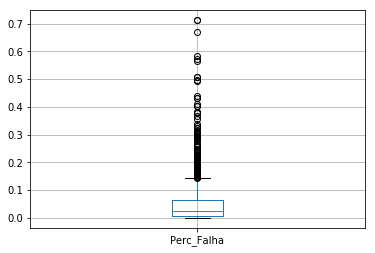

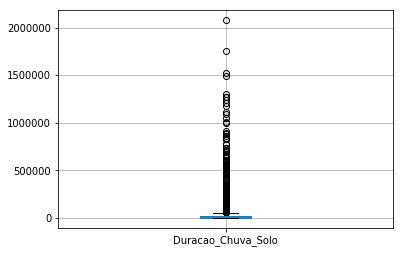

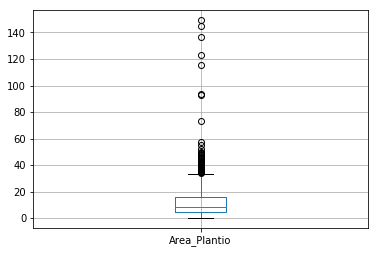

Boxplot de radSolar e chuva


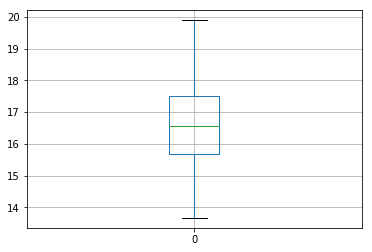

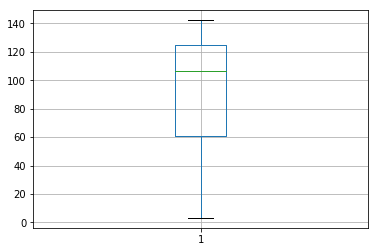

In [195]:
#Dessa vez, os atributos serão selecionados, formando uma cópia reduzida do dataset
agro = pd.concat([percFalha,dataset[['Duracao_Chuva_Solo']],dataset[['Area_Plantio']], radSolar, chuva], axis=1).copy()
agro = agro.dropna()

print('Boxplot de percFalha')
agro.boxplot(column=agro.columns[[0]].tolist(),figsize=(6,4))
plt.show()

agro.boxplot(column=agro.columns[[1]].tolist(),figsize=(6,4))
plt.show()

agro.boxplot(column=agro.columns[[2]].tolist(),figsize=(6,4))
plt.show()

print('Boxplot de radSolar e chuva')
agro.boxplot(column=agro.columns[[3]].tolist(),figsize=(6,4))
plt.show()

agro.boxplot(column=agro.columns[[4]].tolist(),figsize=(6,4))
plt.show()


In [207]:
#Já que os atributos são contínuos, descarta-se a possibilidade de plotar boxplots por classe 
#Analisar-se-ão os outliers de Perc_Falha, Duracao_Chuva_Solo e Area_Plantio 
attrs = ['Perc_Falha', 'Duracao_Chuva_Solo', 'Area_Plantio']

print('Total de unidades experimentais (sem ruidos/dados faltantes) no dataset: ', end='')
print(len(agro[attrs[0]]))

for feature in attrs:
    tolerance = (1.5*(agro[feature].quantile(q=0.75) - agro[feature].quantile(q=0.25))) + agro[feature].quantile(q=0.75)
    print('Total de outliers no atributo '+feature+': ', end='')
    print(len(agro[agro[feature] > tolerance]))



Total de unidades experimentais (sem ruidos/dados faltantes) no dataset: 1638
Total de outliers no atributo Perc_Falha: 154
Total de outliers no atributo Duracao_Chuva_Solo: 259
Total de outliers no atributo Area_Plantio: 59


#### Respondendo perguntas sobre boxplot

- O boxplot ajuda numa melhor compreensão dos dados?

    Neste dataset, foi possível observar que três atributos utilizados nas hipóteses possuem muitas unidades experimentais fora do intervalo de quartis, dificultando a análise para a validação das hipóteses. Inclusive, é um caso grave em que um atributo que possivelmente seria uma classe do dataset (Perc_Falha) possui muitos outliers.


- Porque e quando você usaria o boxplot?
     
     Como, novamente, o dataset possui apenas valores contínuos, é complicado fazer a separação por classe, então, a análise separada dos atributos auxilia a enxergar o comportamento dos dados em uma instância intervalar e permite, no caso, descartar o uso de medidas de centralidade para tomadas de decisão. 
     Aqui há, ainda, um fato mais grave, pois existem dois atributos que são medidas centrais de um conjunto de atributos e pode ser que analisar intervalos e dispersão desses dois valores (radSolar e chuva) possa resultar em hipóteses falhas. 
     
     
- De acordo com o boxplot, há outliers nos seus atributos? se sim esses pontos marcados como outliers parecem mesmo outliers? explique.
    Sim, nos atributos Perc_Falha, Area_Plantio e Duracao_Chuva_Solo. Pelo bloxpot, novamente, podemos observar que os dois últimos são valores absolutos e que, se tivessem problemas, seriam na fase de coleta. Quanto ao percentual de falhas, neste caso escrito entre 0 e 1, os outliers respeitam o intervalo; por isso, novamente, se houveram erros, podem ter sido no momento de coleta.

### 2.2. Intervalo máximo e estatística descritiva

In [208]:
agro.max() - agro.min()

Perc_Falha            7.118000e-01
Duracao_Chuva_Solo    2.075391e+06
Area_Plantio          1.491030e+02
0                     6.225000e+00
1                     1.389750e+02
dtype: float64

Lembrando que 0 representa a média de radiação solar no ano (radSolar) e 1 representa a média de chuvas (chuva).

#### Respondendo questões sobre intervalos máximos

- O intervalo máximo pode induzir ao erro ao interpretá-lo? Em qual cenário? Mostrar no seu dataset se possível, se não for o caso para o dataset explicar em um cenário que ocorre.
   
   Para este dataset, observar o espalhamento não é muito útil, tendo em vista que as hipóteses se centram em relação a comparação de pares. 

### 2.3. Momentos estatísticos centrados e originais

In [216]:
#vetor com as strings dos atributos
attrs = ['Perc_Falha', 'Duracao_Chuva_Solo', 'Area_Plantio']

#Calculo do momento original dos atributos
for feature in attrs:
    values = agro[feature].value_counts().index.values
    prob = agro[feature].value_counts().values / np.sum(agro[feature].value_counts().values)
    for k in range(1,5):
        mi_k = 0
        for i in range(len(values)):
            mi_k += np.power(values[i],k) * prob[i]
        print('O momento original para k = '+str(k)+' do atributo '+feature+' é: '+str(mi_k))

#radSolar
values = agro[0].value_counts().index.values
prob = agro[0].value_counts().values / np.sum(agro[0].value_counts().values)
for k in range(1,5):
    mi_k = 0
    for i in range(len(values)):
        mi_k += np.power(values[i],k) * prob[i]
    print('O momento original para k = '+str(k)+' do atributo radSolar é: '+str(mi_k))
    
#chuva
values = agro[1].value_counts().index.values
prob = agro[1].value_counts().values / np.sum(agro[1].value_counts().values)
for k in range(1,5):
    mi_k = 0
    for i in range(len(values)):
        mi_k += np.power(values[i],k) * prob[i]
    print('O momento original para k = '+str(k)+' do atributo chuva é: '+str(mi_k))
        
print('\n\n')        



#Calculo do momento central dos atributos, estes métodos já são provenientes da PANDAS
for feature in attrs:
    print('O momento central para k = 1 do atributo '+feature+' é: '+str(agro[feature].mad()))
    print('O momento central para k = 2 do atributo '+feature+' é: '+str(agro[feature].var()))
    print('O momento central para k = 3 do atributo '+feature+' é: '+str(agro[feature].skew()))
    print('O momento central para k = 4 do atributo '+feature+' é: '+str(agro[feature].kurtosis()))

print('O momento central para k = 1 do atributo radSolar é: '+str(agro[0].mad()))
print('O momento central para k = 2 do atributo radSolar é: '+str(agro[0].var()))
print('O momento central para k = 3 do atributo radSolar é: '+str(agro[0].skew()))
print('O momento central para k = 4 do atributo radSolar é: '+str(agro[0].kurtosis()))

print('O momento central para k = 1 do atributo chuva é: '+str(agro[1].mad()))
print('O momento central para k = 2 do atributo chuva é: '+str(agro[1].var()))
print('O momento central para k = 3 do atributo chuva é: '+str(agro[1].skew()))
print('O momento central para k = 4 do atributo chuva é: '+str(agro[1].kurtosis()))



O momento original para k = 1 do atributo Perc_Falha é: 0.05269255189255188
O momento original para k = 2 do atributo Perc_Falha é: 0.008730330952380959
O momento original para k = 3 do atributo Perc_Falha é: 0.0026957790573540912
O momento original para k = 4 do atributo Perc_Falha é: 0.0011767333629165576
O momento original para k = 1 do atributo Duracao_Chuva_Solo é: 57234.572649572656
O momento original para k = 2 do atributo Duracao_Chuva_Solo é: 33075356691.970726
O momento original para k = 3 do atributo Duracao_Chuva_Solo é: 3.3129009105431444e+16
O momento original para k = 4 do atributo Duracao_Chuva_Solo é: 4.230342925457454e+22
O momento original para k = 1 do atributo Area_Plantio é: 11.887299145299153
O momento original para k = 2 do atributo Area_Plantio é: 284.8364911758247
O momento original para k = 3 do atributo Area_Plantio é: 14320.920494907454
O momento original para k = 4 do atributo Area_Plantio é: 1319186.8873824335
O momento original para k = 1 do atributo rad

#### Respondendo perguntas sobre momentos

- Quando é indicado utilizar os momentos estatísticos para EDA?
    
    Os momentos são utilizados para descrição de comportamentos específicos dos atributos da base de dados, mais especificamente: a média é utilizada para observar a centralidade dos dados; a variância serve para verificar o quão longe, em geral, os valores do dataset estão da média obtida, verificando o espalhamento; a obliquidade é uma medida que observa simetria nos dados, inferindo sobre a distribuição; assim como a curtose, que, por sua vez, analisa o achatamento da função de distribuição. Todas as medidas citadas anteriormente podem ser utilizadas para observar a hipóteses dos dados seguirem distribuições normais.
 
 
- Pelos valores dos momentos centrados, os atributos parecem seguir uma distribuição normal (nos slides tem uma indicação de quando um atributo parece seguir uma normal)? Explique. Se já existe uma função para alguma medida pode utilizar, caso contrário você precisa implementar tal método.

     Olhando por atributo, os momentos não parecem indicar que algum atributo segue uma distribuição normal.

### 3. Conclusão
#### Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas para questões

As hipóteses serão mantidas tendo em vista que seus escopos estão mais atribuídos à verificação de correlações e covariâncias. No entanto, foi importante perceber o alto espalhamento de alguns atributos, o que pode fazer repensar, futuramente, os atributos obtidos por medidas centralizadas e as escolhas de atributos em geral.